In [4]:
import pandas as pd

df = pd.read_csv("Highest Holywood Grossing Movies.csv", index_col="Unnamed: 0")
df.head()

,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000,77025481,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000,357115007,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,December 14 2022 (EMEA APAC),134100226,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000,28638131,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000,247966675,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13


Перед нами датафрейм, содержащий разностороннюю информацию о 1000 самых кассовых фильмов всех времен. Нашей целью является комплексный анализ связей различных характеристик картины с его финальными сборами, а также выявление основных тенденций на поприще коммерчески успешных кинофильмов.

In [6]:
df.shape

(1000, 13)

В датасете 13 столбцов и 1000 строк


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       1000 non-null   object
 1   Movie Info                  1000 non-null   object
 2   Year                        1000 non-null   int64 
 3   Distributor                 999 non-null    object
 4   Budget (in $)               1000 non-null   object
 5   Domestic Opening (in $)     1000 non-null   object
 6   Domestic Sales (in $)       1000 non-null   int64 
 7   International Sales (in $)  1000 non-null   int64 
 8   World Wide Sales (in $)     1000 non-null   int64 
 9   Release Date                1000 non-null   object
 10  Genre                       1000 non-null   object
 11  Running Time                1000 non-null   object
 12  License                     943 non-null    object
dtypes: int64(4), object(9)
memory usage: 109.4+ KB


Количественные признаки:

1) Year - год выхода фильма, принимает дискретные значения
2) Budget - производственный бюджет картины в долларах, только целые значения
3) Domestic Sales - сборы фильма в домашнем прокате в долларах, округленные значения
4) International Sales - сборы фильма за рубежом в долларах, целые значения
5) World Wide Sales - сборы фильма в мировом прокате (домашний + зарубежный) в долларах, округленные значения
6) Domestic Opening - сборы фильма в открывающую неделю в долларах, дискретные значения
7) Running Time - хронометраж фильма в часах и минутах

Категориальные признаки:

1) Title - оригинальное название фильма
2) Distributor - прокатчик фильма
3) Movie Info - синопсис фильма
4) Genre - список жанров, к которым относится фильм
5) Release Date - дата выхода
6) License - возрастной рейтинг, определяющий каким возрастным категориям разрешено посещать фильм


In [10]:
df["Distributor"].isna().sum(), df["License"].isna().sum()

(1, 57)

Только в 2 колонках встретились пропуски (2 колонка данных из df.info()):

Подсчитаем их с помощью isna().sum():

1) Distributor (1 пропуск)
2) License (57 пропусков)

Заметим, что пропуски возникли в колонках с категориальными признаками, поэтому их необходимо заменить на моду (среднего у таких признаков нет)

In [12]:
mode_dis = df["Distributor"].mode()[0]
mode_lic = df["License"].mode()[0]
mode_dis, mode_lic

('Warner Bros.', 'PG-13')

In [13]:
df[df["Distributor"] == mode_dis].shape, df[df["License"] == mode_lic].shape

((166, 13), (486, 13))

In [14]:
df["fillna_Distributor"] = df["Distributor"].fillna(mode_dis)
df["fillna_License"] = df["License"].fillna(mode_lic)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       1000 non-null   object
 1   Movie Info                  1000 non-null   object
 2   Year                        1000 non-null   int64 
 3   Distributor                 999 non-null    object
 4   Budget (in $)               1000 non-null   object
 5   Domestic Opening (in $)     1000 non-null   object
 6   Domestic Sales (in $)       1000 non-null   int64 
 7   International Sales (in $)  1000 non-null   int64 
 8   World Wide Sales (in $)     1000 non-null   int64 
 9   Release Date                1000 non-null   object
 10  Genre                       1000 non-null   object
 11  Running Time                1000 non-null   object
 12  License                     943 non-null    object
 13  fillna_Distributor          1000 non-null   object
 14

Мы создали два столбца: "fillna_Distributor" и "fillna_License", теперь будем работать с ними, а не с соответствующими первоначальными столбцами

In [16]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

Проверили датасет на дубликаты (полностью идентичные строки), их нет

In [18]:
df["Budget (in $)"] = df["Budget (in $)"].apply(lambda x: int(x) if x.isnumeric() == True else None)

In [19]:
df['Domestic Opening (in $)'] = df["Domestic Opening (in $)"].apply(lambda x: int(x) if x.isnumeric() == True else None)

Чтобы работать с выбросами по признакам Domestic Opening и Budget, мы должны преобразовать их в числовые данные (int), однако у некоторых фильмов стояли данные, включавшие буквы, что затруднило их преобразование. Изучив возможные значения (часть из них была в числовом виде, часть начиналась с буквы, часть включала строку "hr"), мы составили вышенаписанные функции и неподходящие по формату ячейки заменили на None, а к нормальных применили функцию int().

In [21]:
bud_median = df["Budget (in $)"].median()
bud_mean = df["Budget (in $)"].mean()
bud_median, bud_mean

(85000000.0, 97423917.19745223)

In [22]:
domopen_median = df["Domestic Opening (in $)"].median()
domopen_mean = df["Domestic Opening (in $)"].mean()
domopen_median, domopen_mean

(32790735.0, 42695054.83230453)

<Axes: title={'center': 'Рис.1 Гистограмма распределения фильмов по бюджету'}, xlabel='Бюджет', ylabel='Частота'>

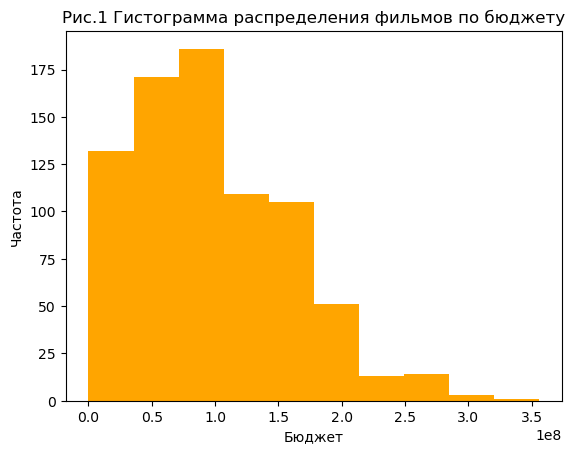

In [23]:
df["Budget (in $)"].plot(kind="hist", xlabel="Бюджет", ylabel="Частота", title = "Рис.1 Гистограмма распределения фильмов по бюджету", color="orange")

<Axes: title={'center': 'Рис.2 Гистограмма распределения фильмов по сборам за первый уикенд'}, xlabel='Сборы за премьерный уикенд', ylabel='Частота'>

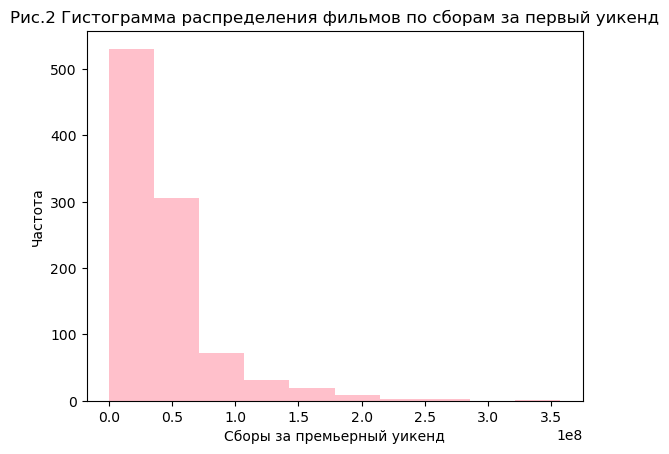

In [24]:
df["Domestic Opening (in $)"].plot(kind="hist",  xlabel="Сборы за премьерный уикенд", ylabel="Частота", title = "Рис.2 Гистограмма распределения фильмов по сборам за первый уикенд", color="pink")

После применения функций некоторые ячейки приняли значение None, то есть образовались пропуски. Их можно заполнить медианой или средним. Для обеих колонок медиана меньше среднего, что говорит о правосторонней асимметрии (см.графики), а значит, о наличии экстремально высоких значений. Так как медиана ближе к моде, а значит, точнее отражает распределение значений, пропуски мы заполним именно ею.

In [26]:
df["fillna_domopen"] = df["Domestic Opening (in $)"].fillna(domopen_median)

In [27]:
df["fillna_bud"] = df["Budget (in $)"].fillna(bud_median)

In [28]:
df.head()

,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License,fillna_Distributor,fillna_License,fillna_domopen,fillna_bud
0,Avatar,A paraplegic Marine dispatched to the moon Pan...,2009,Twentieth Century Fox,237000000.0,77025481.0,785221649,2138484377,2923706026,16-Dec-09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,Twentieth Century Fox,PG-13,77025481.0,237000000.0
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,2019,Walt Disney Studios Motion Pictures,356000000.0,357115007.0,858373000,1941066100,2799439100,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,Walt Disney Studios Motion Pictures,PG-13,357115007.0,356000000.0
2,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,2022,20th Century Studios,NaN,134100226.0,684075767,1636174514,2320250281,24-Apr-19,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,20th Century Studios,PG-13,134100226.0,85000000.0
3,Titanic,A seventeen-year-old aristocrat falls in love ...,1997,Paramount Pictures,200000000.0,28638131.0,674292608,1590450697,2264743305,19-Dec-97,"['Drama', 'Romance']",3 hr 14 min,PG-13,Paramount Pictures,PG-13,28638131.0,200000000.0
4,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",2015,Walt Disney Studios Motion Pictures,245000000.0,247966675.0,936662225,1134647993,2071310218,16-Dec-15,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,Walt Disney Studios Motion Pictures,PG-13,247966675.0,245000000.0


Мы создали два столбца fillna_domopen и fillna_bud с замененными на медиану пропусками. Теперь можно переходить к удалению выбросов.  Мы выбрали принцип 1.5*IQR, так как он основан на значении квартилей, менее подверженных влиянию экстремальных значений, нежели стандартное отклонение, которое зависит от среднего, значительно меняющегося из-за выбросов.

Начнём с признака Domestic Sales.

In [31]:
iqr_doms = df["Domestic Sales (in $)"].quantile(0.75) - df["Domestic Sales (in $)"].quantile(0.25)
high_doms = df["Domestic Sales (in $)"].quantile(0.75) + 1.5*iqr_doms
low_doms = df["Domestic Sales (in $)"].quantile(0.25) - 1.5*iqr_doms

low_doms, high_doms #определили границы для чистых значений

(-58286284.5, 352410623.5)

In [32]:
df2 = df[(df["Domestic Sales (in $)"] >= low_doms) & (df["Domestic Sales (in $)"] <= high_doms)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 23 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       929 non-null    object 
 1   Movie Info                  929 non-null    object 
 2   Year                        929 non-null    int64  
 3   Distributor                 928 non-null    object 
 4   Budget (in $)               732 non-null    float64
 5   Domestic Opening (in $)     906 non-null    float64
 6   Domestic Sales (in $)       929 non-null    int64  
 7   International Sales (in $)  929 non-null    int64  
 8   World Wide Sales (in $)     929 non-null    int64  
 9   Release Date                929 non-null    object 
 10  Genre                       929 non-null    object 
 11  Running Time                929 non-null    object 
 12  License                     873 non-null    object 
 13  fillna_Distributor          929 non-nul

В переменную df2 положили очищенный от выбросов df1, получили, что во всех колонках (за исключением тех, которым создали замену с подзаголовком "fillna_") осталось 929 объектов. Далее уберём выбросы по признаку International Sales.

In [34]:
iqr_ints = df2['International Sales (in $)'].quantile(0.75) - df2['International Sales (in $)'].quantile(0.25)
high_ints = df2['International Sales (in $)'].quantile(0.75) + 1.5 * iqr_ints
low_ints = df2['International Sales (in $)'].quantile(0.25) - 1.5 * iqr_ints

low_ints, high_ints #определили границы для чистых значений

(-95552807.5, 501008868.5)

In [35]:
df3 = df2[(df2['International Sales (in $)'] >= low_ints) & (df2['International Sales (in $)'] <= high_ints)]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 99 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       865 non-null    object 
 1   Movie Info                  865 non-null    object 
 2   Year                        865 non-null    int64  
 3   Distributor                 864 non-null    object 
 4   Budget (in $)               687 non-null    float64
 5   Domestic Opening (in $)     842 non-null    float64
 6   Domestic Sales (in $)       865 non-null    int64  
 7   International Sales (in $)  865 non-null    int64  
 8   World Wide Sales (in $)     865 non-null    int64  
 9   Release Date                865 non-null    object 
 10  Genre                       865 non-null    object 
 11  Running Time                865 non-null    object 
 12  License                     809 non-null    object 
 13  fillna_Distributor          865 non-nul

В переменную df3 положили очищенный от выбросов df2, получили, что во всех колонках (за исключением тех, которым создали замену с подзаголовком "fillna_") осталось 865 объектов. Далее уберём выбросы по признаку World Wide Sales.

In [37]:
iqr_wws = df3['World Wide Sales (in $)'].quantile(0.75) - df3['World Wide Sales (in $)'].quantile(0.25)
high_wws = df3['World Wide Sales (in $)'].quantile(0.75) + 1.5 * iqr_wws
low_wws = df3['World Wide Sales (in $)'].quantile(0.25) - 1.5 * iqr_wws

low_wws, high_wws #определили границы для чистых значений

(-47139033.5, 662831946.5)

In [38]:
df4 = df3[(df3['World Wide Sales (in $)'] >= low_wws) & (df3['World Wide Sales (in $)'] <= high_wws)]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 156 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       836 non-null    object 
 1   Movie Info                  836 non-null    object 
 2   Year                        836 non-null    int64  
 3   Distributor                 835 non-null    object 
 4   Budget (in $)               661 non-null    float64
 5   Domestic Opening (in $)     813 non-null    float64
 6   Domestic Sales (in $)       836 non-null    int64  
 7   International Sales (in $)  836 non-null    int64  
 8   World Wide Sales (in $)     836 non-null    int64  
 9   Release Date                836 non-null    object 
 10  Genre                       836 non-null    object 
 11  Running Time                836 non-null    object 
 12  License                     780 non-null    object 
 13  fillna_Distributor          836 non-nu

В переменную df4 положили очищенный от выбросов df3, получили, что во всех колонках (за исключением тех, которым создали замену с подзаголовком 
"fillna_") осталось 836 объектов. Далее уберём выбросы по признаку fillna_domopen.

In [40]:
iqr_fn_domop = df4['fillna_domopen'].quantile(0.75) - df4['fillna_domopen'].quantile(0.25)
low_fn_domop = df4['fillna_domopen'].quantile(0.25) - 1.5 * iqr_fn_domop
high_fn_domop = df4['fillna_domopen'].quantile(0.75) + 1.5 * iqr_fn_domop

low_fn_domop, high_fn_domop #Вычислили граничные значения

(-18274193.75, 79183626.25)

In [41]:
df5 = df4[(df4['fillna_domopen'] >= low_fn_domop) & (df4['fillna_domopen'] <= high_fn_domop)]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 157 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       816 non-null    object 
 1   Movie Info                  816 non-null    object 
 2   Year                        816 non-null    int64  
 3   Distributor                 815 non-null    object 
 4   Budget (in $)               646 non-null    float64
 5   Domestic Opening (in $)     793 non-null    float64
 6   Domestic Sales (in $)       816 non-null    int64  
 7   International Sales (in $)  816 non-null    int64  
 8   World Wide Sales (in $)     816 non-null    int64  
 9   Release Date                816 non-null    object 
 10  Genre                       816 non-null    object 
 11  Running Time                816 non-null    object 
 12  License                     761 non-null    object 
 13  fillna_Distributor          816 non-nu

В переменную df5 положили очищенный от выбросов df4, получили, что во всех колонках (за исключением тех, которым создали замену с подзаголовком 
"fillna_") осталось 816 объектов. Далее уберём выбросы по признаку fillna_bud.

In [43]:
iqr_fn_bud = df5['fillna_bud'].quantile(0.75) - df5['fillna_bud'].quantile(0.25)
low_fn_bud = df5['fillna_bud'].quantile(0.25) - 1.5 * iqr_fn_bud
high_fn_bud = df5['fillna_bud'].quantile(0.75) + 1.5 * iqr_fn_bud

low_fn_bud, high_fn_bud #Вычислили граничные значения

(-15875000.0, 173125000.0)

In [44]:
df6 = df5[(df5['fillna_bud'] >= low_fn_bud) & (df5['fillna_bud'] <= high_fn_bud)]
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 157 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       771 non-null    object 
 1   Movie Info                  771 non-null    object 
 2   Year                        771 non-null    int64  
 3   Distributor                 770 non-null    object 
 4   Budget (in $)               601 non-null    float64
 5   Domestic Opening (in $)     748 non-null    float64
 6   Domestic Sales (in $)       771 non-null    int64  
 7   International Sales (in $)  771 non-null    int64  
 8   World Wide Sales (in $)     771 non-null    int64  
 9   Release Date                771 non-null    object 
 10  Genre                       771 non-null    object 
 11  Running Time                771 non-null    object 
 12  License                     717 non-null    object 
 13  fillna_Distributor          771 non-nu

In [45]:
df6.shape

(771, 17)

In [46]:
df6.describe()

,Year,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),fillna_domopen,fillna_bud
count,771.000000,6.010000e+02,7.480000e+02,7.710000e+02,7.710000e+02,7.710000e+02,7.710000e+02,7.710000e+02
mean,2006.775616,7.715470e+07,2.912713e+07,1.251897e+08,1.832634e+08,3.041683e+08,2.923642e+07,7.888453e+07
std,11.044901,4.274501e+07,1.816189e+07,5.899455e+07,8.439008e+07,1.079460e+08,1.789945e+07,3.787261e+07
min,1937.000000,1.500000e+04,7.456000e+03,6.752000e+03,2.450000e+07,1.799689e+08,7.456000e+03,1.500000e+04
25%,2000.000000,4.000000e+07,1.672924e+07,8.598825e+07,1.191283e+08,2.158631e+08,1.709241e+07,5.000000e+07
50%,2009.000000,7.500000e+07,2.755276e+07,1.200596e+08,1.661272e+08,2.714573e+08,2.859137e+07,8.500000e+07
75%,2015.000000,1.050000e+08,4.058821e+07,1.609020e+08,2.295739e+08,3.654677e+08,4.032697e+07,9.780000e+07
max,2023.000000,1.700000e+08,7.721132e+07,3.501590e+08,4.840295e+08,6.578697e+08,7.721132e+07,1.700000e+08


In [47]:
df6[df6["Year"] == 1937]

,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License,fillna_Distributor,fillna_License,fillna_domopen,fillna_bud
966,Snow White and the Seven Dwarfs,Exiled into the dangerous forest by her wicked...,1937,Walt Disney Studios Motion Pictures,NaN,1499000.0,184925486,184925486,184928542,18-May-01,"['Drama', 'Musical', 'Romance']",2 hr 7 min,PG-13,Walt Disney Studios Motion Pictures,PG-13,1499000.0,85000000.0


1) Самый старый фильм в очищенной выборке - "Snow White and the Seven Dwarfs", он был выпущен в 1937. Разница между ним и самыми актуальными фильмами в подборке равна 86 годам. Интересно, что в 1939 главный продюсер фильма Уолт Дисней получил 1 большой и 7 маленьких оскаров за вклад в развитие анимации, что стало своеобразной отсылкой именно к этому мультфильму.

In [49]:
df6.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Year,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),fillna_domopen,fillna_bud
count,771.00000,601.00000,748.00000,771.00000,771.00000,771.00000,771.00000,771.00000
mean,2006.77562,77154700.49917,29127127.37834,125189672.16342,183263357.08301,304168343.67575,29236417.87808,78884533.07393
std,11.04490,42745007.12649,18161888.20565,58994552.33516,84390075.35373,107946001.57165,17899451.20620,37872609.16773
min,1937.00000,15000.00000,7456.00000,6752.00000,24500000.00000,179968873.00000,7456.00000,15000.00000
25%,2000.00000,40000000.00000,16729237.00000,85988250.00000,119128263.50000,215863149.00000,17092408.00000,50000000.00000
50%,2009.00000,75000000.00000,27552756.50000,120059556.00000,166127224.00000,271457301.00000,28591370.00000,85000000.00000
75%,2015.00000,105000000.00000,40588210.50000,160902023.50000,229573881.50000,365467671.50000,40326969.50000,97800000.00000
max,2023.00000,170000000.00000,77211321.00000,350159020.00000,484029542.00000,657869686.00000,77211321.00000,170000000.00000


2) Мы применили функцию, чтобы числовые значения значения стали читаемыми. Теперь можем их анализировать. 
Обратим внимание на признак International Sales (in $), его среднее значение равно 183263357.08301, а стандартное отклонение 84390075.35373. Зная их можем найти коэффициент вариации, чтобы оценить степень однородности данных:

In [51]:
coef_var = (84390075.35373/183263357.08301)*100
coef_var #в процентах

46.04852639227007

Оказалось, что коэффициент вариации составляет около 46%, что говорит о значительной степени рассеивания данных и неоднородности совокупности

In [53]:
df6.describe(include = 'object')

,Title,Movie Info,Distributor,Release Date,Genre,Running Time,License,fillna_Distributor,fillna_License
count,771,771,770,771,771,771,717,771,771
unique,765,771,65,553,249,94,4,65,4
top,Hercules,A special bond develops between plus-sized inf...,Warner Bros.,20-Mar-14,"['Action', 'Adventure', 'Thriller']",1 hr 46 min,PG-13,Warner Bros.,PG-13
freq,2,1,121,5,29,22,337,122,391


3) Обратимся к данным с типом object. К нашему удивлению, максимальная частота значений по признаку Title равна 2, то есть какое-то название фильма встретилось дважды. Ошибка? Нет, просто в датасете есть два разных фильма с названием "Hercules": легендарный мультфильм 1997 года и фэнтезийный боевик с Дуэйном Джонсоном из 2014 года.

4) Также интересно, что самым частым сочетанием жанров является ['Action', 'Adventure', 'Thriller'], частота составляет 29. Оно же и свойственно для так называемых "фильмов-аттракционов", которые призваны завлекать зрителей в кинотеатры.

Теперь перейдём к визуализации.

<Axes: title={'center': 'Рис.3 Круговая диаграмма распределения лицензий фильмов'}, ylabel='count'>

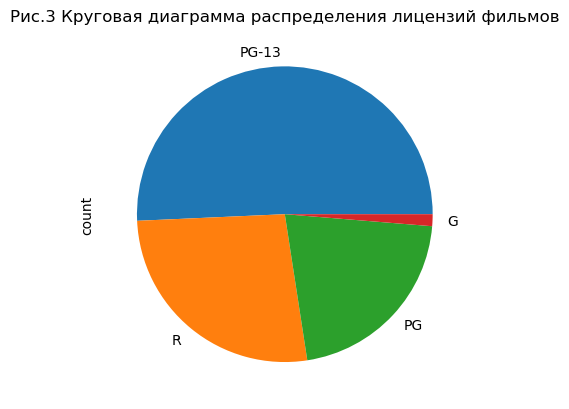

In [55]:
df6["fillna_License"].value_counts().plot(kind="pie", title="Рис.3 Круговая диаграмма распределения лицензий фильмов")

По круговой диаграмме видно, что рейтинг PG-13 (просмотр разрешен с 13 лет) установлен для более, чем половины фильмов из датафрейма. Около четверти занимают как лицензия R (17+), так и PG (разрешен для просмотра детьми только с родителями, находится между R и G). Едва заметная доля за фильмами с рейтингом G (демонстрируруется без ограничений). Можно сделать вывод о том, что PG - самый компромиссный рейтинг в том смысле, что он позволяет собрать в кинозалах и основную часть детской аудитории (подростки), и допускает достаточно вольностей в плане юморе и жестокости, чтобы привлечь взрослых. Поэтому наибольшую вероятность добиться огромных сборов студии видят именно с фильмами с рейтингом PG-13.

Фильмы с лицензиями R и PG, вероятно, собирают только за счет одной из ранее описанных категорий, поэтому по частоте схожи, ну а картины с рейтингом G требуют сверхосторожности создателей и не вызывают интереса у людей старше 12-13 лет, потому и встречаются редко.

<Axes: title={'center': 'Рис.4 Взаимосвязь между производственным бюджетом фильма и его мировыми сборами'}, xlabel='Производственный бюджет', ylabel='Сборы в мировом прокате'>

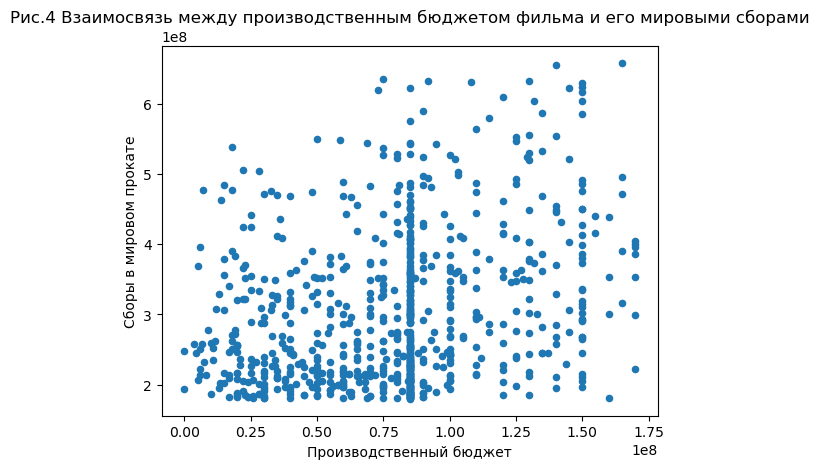

In [57]:
df6.plot(kind="scatter", x="fillna_bud", y="World Wide Sales (in $)", xlabel = "Производственный бюджет", ylabel="Сборы в мировом прокате", title="Рис.4 Взаимосвязь между производственным бюджетом фильма и его мировыми сборами")

Построим облако рассеивания, отображающее взаимосвязь между бюджетом фильма и его итоговыми мировыми сборами. Заметим, что одному значению по X часто соответствуют несколько значений по Y, а также линейный тренд визуально неочевиден. Эти факты говорят о слабой корреляции/связи признаков.

<Axes: title={'center': 'Рис.5 Топ-10 дистрибьюторов по количеству кассовых фильмов'}, xlabel='fillna_Distributor', ylabel='Количество фильмов студии среди самых кассовых'>

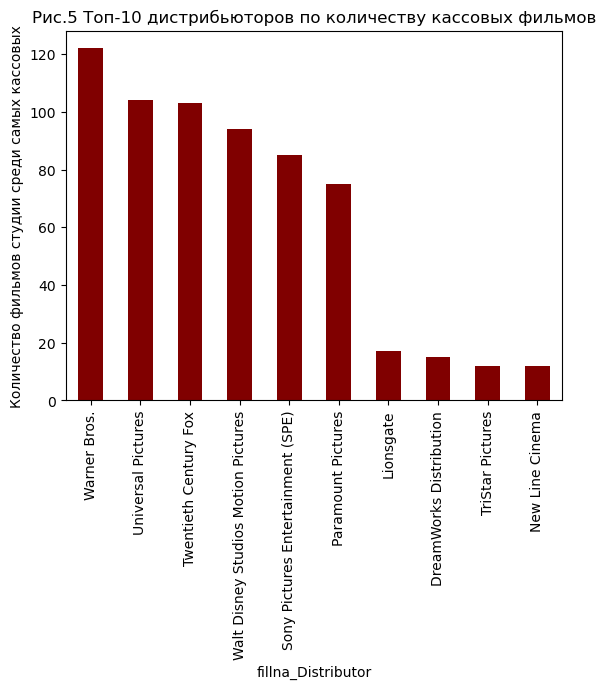

In [59]:
df6["fillna_Distributor"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar", ylabel="Количество фильмов студии среди самых кассовых",   color="maroon", title="Рис.5 Топ-10 дистрибьюторов по количеству кассовых фильмов")

По столбчатой диаграмме виден значительный отрыв по количеству коммерчески успешных фильмов первых 6 компаний-дистрибьюторов от оставшихся 4. Более того, лидер Warner Bros. имеет заметный отрыв от второго места (Universal Pictures). Заметим, что обладающая правами на огромное количество франшиз компания Disney в списке не вошла в тройку, а вот 20th Century Fox, недавно ставшая ее подразделением, получает бронзу. А главное, даже по первым 10 значениям видно, что разброс частот этого признака сильно варьируется

# К/Т 3

Теперь создадим новый DataFrame, из которого удалим колонки с пропусками:

In [62]:
df7 = df6.drop(columns = ['Distributor', 'License', 'Domestic Opening (in $)', 'Budget (in $)'])
df_checker = df7.copy() # Этот DataFrame пригодится нам далее, при обработке данных для обучения

In [63]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 157 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       771 non-null    object 
 1   Movie Info                  771 non-null    object 
 2   Year                        771 non-null    int64  
 3   Domestic Sales (in $)       771 non-null    int64  
 4   International Sales (in $)  771 non-null    int64  
 5   World Wide Sales (in $)     771 non-null    int64  
 6   Release Date                771 non-null    object 
 7   Genre                       771 non-null    object 
 8   Running Time                771 non-null    object 
 9   fillna_Distributor          771 non-null    object 
 10  fillna_License              771 non-null    object 
 11  fillna_domopen              771 non-null    float64
 12  fillna_bud                  771 non-null    float64
dtypes: float64(2), int64(4), object(7)
mem

При построении корреляционной матрицы мы решили не учитывать признак 'Year', так как он является дискретным признаком, указывающим на год выхода фильма. Интерпретация его корреляции, например с бюджетом, будет бессмысленной, так как потенциальный рост/падение сборов с увеличением года у самых успешных фильмов вряд ли скажет что-то об общем состоянии индустрии или явных тенденциях, ведь в наш датасет не вошли фильмы с большими бюджетами и низкими сборами.

Также этот признак точно не будет использован при построении модели, ведь его значения придется строго ограничивать. Во-первых, признак дискретный, во-вторых, мы не сможем брать год раньше текущего для максимизации сборов, если окажется, что фильм с более ранней датой выхода обычно более успешен в прокате, и в третьих, если более поздние картины в среднем более успешные, сдвигать дату релиза фильма на целые годы для потенциального увеличения сборов тоже будет очень странным решением в реалиях кинобизнеса.

In [65]:
df7.corr(numeric_only=True).drop(index=['Year'], columns = ['Year'])

,Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),fillna_domopen,fillna_bud
Domestic Sales (in $),1.000000,0.132117,0.581435,0.523692,-0.001209
International Sales (in $),0.132117,1.000000,0.830678,0.180119,0.366952
World Wide Sales (in $),0.581435,0.830678,1.000000,0.420249,0.302973
fillna_domopen,0.523692,0.180119,0.420249,1.000000,0.293423
fillna_bud,-0.001209,0.366952,0.302973,0.293423,1.000000


Построив корреляционную матрицу, можно сделать вывод о том, у каких признаков наблюдается наиболее сильная корреляция. Это признаки 'World Wide Sales in dollars' и 'International Sales in dollars'. Это объясняется тем, что  'World Wide Sales (in dollars)' (сборы во всем мире)- это сумма 'International Sales' (сборы за пределами США) и 'Domestic Sales' (сборы в США). При этом коэффициент корреляции между 'World Wide Sales (in dollars)' и 'Internation Sales (in dollars)' меньше единицы из-за низкой корреляции между 'Domestic Sales (in dollars)' и 'Internationl Sales (in dollars)'. 

То есть, между собой сборы В США и суммарные сборы во всех остальных странах слабо коррелируют, и полностью предсказать их сумму только по 'Internationl Sales (in dollars)' вряд ли получится, несмотря на то, что в большинстве случаев сборы за рубежом занимают бОльшую долю в совокупных сборах фильма

<Axes: title={'center': 'Рис. 6 Диаграмма Рассеивания между мировыми сборами фильма и сборами вне США'}, xlabel='International Sales (in $)', ylabel='World Wide Sales (in $)'>

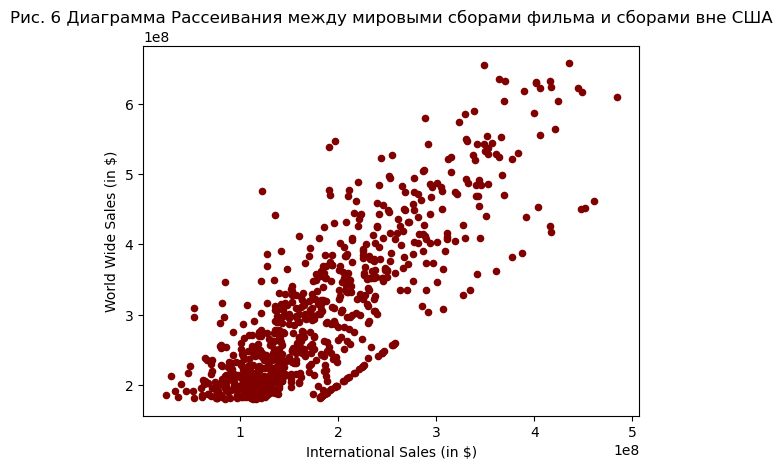

In [67]:
df7.plot.scatter(x = 'International Sales (in $)', y = 'World Wide Sales (in $)', title='Рис. 6 Диаграмма Рассеивания между мировыми сборами фильма и сборами вне США', color='maroon')


По диаграмме рассеивания отчетливо видна прямая линейная связь между сборами фильма за пределами США и общими сборами фильма, а значит коэффициент корреляции действительно высок

Теперь мы построим линейную регрессию, предсказывающую совокупыне сборы фильмов по миру в зависимости от начального бюджета ('Budget'), типа лицензии (возрастной рейтинг) ('License') и сборы в первые выходные ('Domestic Open').

Используем именно это признаки, потому что мы моделируем ситуацию, что фильм находится в прокате только пару дней или один уикенд (то есть Domestic Open уже произошел, и значения стартовых сборов известны), мы знаем аудиторию, которая потенциально может на него пойти (к примеру, от фильма с лицензией на показ только лицам старше 18 лет мы будем ждать меньших сборов,нежели для фильма с ограничением 6+), и знаем, каковы вложения в производство фильма.

Такая задача часто имеет место у дистрибьюторов фильмов, когда они решают, что выгоднее: оставить фильм в кинотеатре на подольше в связи с хорошим стартом или изъять из кинотеатров для выпуска на стриминге в случае плохих показателей.

Для начала преобразуем категориальный признак ('License') по one-hot encoding, чтобы мы могли его применить в регрессионном анализе.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [72]:
df7.head()

,Title,Movie Info,Year,Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,fillna_Distributor,fillna_License,fillna_domopen,fillna_bud
157,Big Hero 6,A special bond develops between plus-sized inf...,2014,222527828,435341858,657869686,25-Oct-14,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 42 min,Walt Disney Studios Motion Pictures,PG,56215889.0,165000000.0
159,Pirates of the Caribbean: The Curse of the Bla...,Blacksmith Will Turner teams up with eccentric...,2003,305413918,348850097,654264015,9-Jul-03,"['Action', 'Adventure', 'Fantasy']",2 hr 23 min,Walt Disney Studios Motion Pictures,PG-13,46630690.0,140000000.0
164,Sing,"In a city of humanoid animals, a hustling thea...",2016,270578425,363759959,634338384,2-Dec-16,"['Animation', 'Comedy', 'Family', 'Musical']",1 hr 48 min,Universal Pictures,PG,35258145.0,75000000.0
165,Kung Fu Panda,"To everyone's surprise, including his own, Po,...",2008,215771591,416311606,632083197,5-Jun-08,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 32 min,DreamWorks,PG,60239130.0,130000000.0
166,The Incredibles,"While trying to lead a quiet suburban life, a ...",2004,261441092,370165961,631607053,5-Nov-04,"['Action', 'Adventure', 'Animation', 'Family']",1 hr 55 min,Walt Disney Studios Motion Pictures,PG,70467623.0,92000000.0


In [73]:
encoder = OneHotEncoder(sparse_output=False)
license_encoded = encoder.fit_transform(df7[['fillna_License']])
license_encoded_df = pd.DataFrame(license_encoded, columns=encoder.get_feature_names_out(['fillna_License']))
df7 = pd.concat([df7.drop(columns=['fillna_License']).reset_index(drop=True), license_encoded_df.reset_index(drop=True)], axis=1)

А теперь давайте приступим к построению линейной регрессии

In [75]:
X = df7[['fillna_bud', 'fillna_License_G', 'fillna_License_PG','fillna_License_PG-13','fillna_License_R','fillna_domopen']] #собственно после кодирования количество независимых переменных увеличилось, ведь License теперь стала 4 колонками, в каждой из которых отдельный вид лицензии 
y = df7[['World Wide Sales (in $)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [76]:
model = LinearRegression().fit(X_train,y_train)
y_test_pred = model.predict(X_test)

Коэффициенты регрессии при независимых переменных:

In [78]:
pd.DataFrame(model.coef_[0], index=model.feature_names_in_).round(2)

,0
fillna_bud,0.60
fillna_License_G,93464866.20
fillna_License_PG,-19460183.75
fillna_License_PG-13,-33347287.20
fillna_License_R,-40657395.25
fillna_domopen,2.29


Интерпретации коэффициентов:

- При увеличении производственного бюджета на 1 доллар, его мировые сборы увеличатся на 0.6 долларов
- При увеличении сборов в США в первый уикенд на 1 доллар, его мировые сборы увеличатся на 2.29 доллара
Так как фильму может быть присвоена только одна лицензия из четырёх, то:
- Наличие у фильма лицензии G (т.е 0+) увеличит ранее найденную взвешенную сумму свободного коэффициента и значений fillna_domopen и fillna_bud на 93464866.21 долларов
- Наличие у фильма лицензии PG (т.е 0+, но самым маленьким можно только в сопровождении взрослых) уменьшит ранее найденную взвешенную сумму свободного коэффициента и значений fillna_domopen и fillna_bud на 19460183.76 долларов
- Наличие у фильма лицензии PG-13 (т.е 13+) уменьшит ранее найденную взвешенную сумму свободного коэффициента и значений fillna_domopen и fillna_bud на 33347287.21 долларов
- Наличие у фильма лицензии R (т.е 18+) уменьшит ранее найденную взвешенную сумму свободного коэффициента и значений fillna_domopen и fillna_bud на 40657395.25 долларов

Свободный коэффициент:

In [81]:
model.intercept_[0]

219495527.44774336

Обычно свободный коэффициент - это значение, которое мы получим от модели при равенстве всех независимых переменных нулю,
но в нашем случае это не так, ведь у фильма точно будет одна из лицензий, а значит одна из свободных переменных точно равна 1.
Поэтому явно интерпретировать константу здесь сложно.

Теперь оценим качество модели:

In [84]:
print(f'{MSE(y_test, y_test_pred) = :.2f}')
print(f'{MAE(y_test_pred, y_test) = :.2f}')
print(f'{R2(y_test, y_test_pred) = :.2f}')

MSE(y_test, y_test_pred) = 11694907944881384.00
MAE(y_test_pred, y_test) = 84876660.87
R2(y_test, y_test_pred) = 0.01


Качество модели низкое, о чем говорят  значения MSE, MAE и R2. 

Значение R2 в идеале должно быть равно 1, однако же у нас оно близко к нулю, то есть коэффициент детерминации показывает, что наша модель объясняет только 1% изменчивости мировых кассовых сборов. 

Значение MAE в 84876660.82 - это среднее абсолютное отклонение прогнозных значений от фактических, т.е в среднем наш прогноз отличается
от истины на 84,8 млн.$. Это очень серьезная ошибка для многих фильмов в нашем датасете, хотя для фильмов-миллиардников она и не так критична.

Значение MSE в 11694907921236992.00 - это средний квадрат отклонения значений модели от реальных, оно закономерно выше MAE, ведь сильнее штрафует за сильные отклонения от реальных результатов. Значение получилось 17-тизначное, и даже с поправкой на то, что это квадрат,
оно иллюстрирует катастрофически низкую точность итоговой модели

Теперь попробуем построить нелинейную модель машинного обучения, случайный лес, по тем же данным, чтобы оценить, справится ли она лучше, чем обычная линейная регрессия.

Так как случайный лес строится на объединении множества деревьев решений, использует подвыборки и является более устойчивым к шуму, он может дать более точный прогноз для наших данных.

In [87]:
A = df7[['fillna_bud', 'fillna_License_G', 'fillna_License_PG','fillna_License_PG-13','fillna_License_R','fillna_domopen']]
b = df7[['World Wide Sales (in $)']]
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2 , random_state=42)

In [88]:
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_forest.fit(A_train, b_train)
b_test_pred = model_forest.predict(A_test)

C:\Users\79199\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Теперь оценим качество нелинейной модели:

In [90]:
print(f'{MSE(b_test, b_test_pred) = :.2f}')
print(f'{MAE(b_test_pred, b_test) = :.2f}')
print(f'{R2(b_test, b_test_pred) = :.2f}')

MSE(b_test, b_test_pred) = 10888284370253226.00
MAE(b_test_pred, b_test) = 79384087.77
R2(b_test, b_test_pred) = 0.07


Действительно, случайный лес сделал нашу модель более точной, об этом говорят рост R2 и снижение MAE,MSE,
однако она всё ещё далека от приемлемого уровня качества.

Согласно коэффициенту детерминации R2, наша модель теперь описывает 7% изменчивости мировых кассовых сборов (против 1% в линейной модели).

Среднее абсолютное отклонение MAE теперь составляет примерно 79,4 млн.долларов, то есть прогнозируемые значения стали ближе к фактическим (прошлое значение = 84,8 млн.долларов).


Нелинейные модели имеют разные преимущества над линейными. Во-первых, они способны корректно описывать более сложные 
зависимости (полиномиальные, гиперболичесике), часто встречающиеся в реальных данных, но неподходящие для линейных моделей.

Во-вторых, некоторые нелинейные модели (например, деревья решений) не требуют дополнительного кодирования данных
и спокойно работают как с числовыми, так и с категориальными признаками, тогда как перед обучением линейной модели
нужно провести тщательную подготовку датасета.

В-третьих, зачастую нелинейные модели устойчивы к выбросам и аномальным значениям, тогда как выбросы в линейной модели способны сильно повлиять
на получившееся уравнение прямой.

В то же время, нелинейные модели аналитикам сложнее интерпретировать,
да и вычисления в них более затратные для компьютера, так что и минусы у таких моделей по сравнению с линейными есть.

### Контрольная точка 4

### Построение доверительного интервала для математического ожидания на основании Z-статистики

In [124]:
df8 = df6.drop(columns = ['License', 'Distributor','Domestic Opening (in $)', 'Budget (in $)'])

In [125]:
# Получим случайную выборку из 100 строк
sample_df = df8.sample(n=100, random_state=42)


In [126]:
std_wws = df8["World Wide Sales (in $)"].std()
mean_wws = sample_df["World Wide Sales (in $)"].mean()
alpha = 1 - 0.95
n = sample_df.shape[0]

In [127]:
from scipy.stats import norm

In [128]:
z_crit = norm.ppf(1 - alpha/2)  # для 95% ДИ alpha = 0.05
lower = mean_wws - z_crit * (std_wws / np.sqrt(n))
upper = mean_wws + z_crit * (std_wws / np.sqrt(n))

In [129]:
lower, upper

(282224525.6344464, 324538580.70555365)

In [130]:
df8["World Wide Sales (in $)"].mean()

304168343.6757458

**Вывод**: по итогу проделанных вычислений реальное среднее значение признака 'World Wide Sales (in $)' попало в интервал, посчитанный при помощи z-критерия: [282224525.6344464, 324538580.70555365], а реальное значение среднего - 304168343.6757458

### Построение доверительного интервала для математического ожидания на основании t-статистики

In [133]:
sample_std = sample_df["World Wide Sales (in $)"].std()

In [134]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import t

In [135]:
t_crit = t.ppf(1 - alpha/2, df=n-1)  # df - степени свободы
lower2 = mean_wws - t_crit * (sample_std / np.sqrt(n))
upper2 = mean_wws + t_crit * (sample_std / np.sqrt(n))

In [136]:
lower2, upper2

(282234959.9356467, 324528146.4043533)

In [137]:
df8["World Wide Sales (in $)"].mean()

304168343.6757458

**Вывод**: по итогу проделанных вычислений реальное среднее значение признака 'World Wide Sales (in $)' попало в интервал, посчитанный при помощи t-критерия: [282234959.9356467, 324528146.4043533], а реальное значение среднего - 304168343.6757458

### Проведение z-test на математическое ожидание

Перейдем к составлению и проверке гипотез при помощи z-test.

**Гипотеза**: фильмы из нашей случайной выборки имеют больший бюджет, чем фильмы из генеральной совокупности, если математическое ожидание их бюджета больше среднего значения бюджета по генеральной совокупности, т.е.:

$$
H_0 : \mu \leq \bar{X}
$$
$$
H_A : \mu > \bar{X}
$$

In [143]:
from statsmodels.stats.weightstats import ztest

In [144]:
res = ztest(sample_df['fillna_bud'],
            value = df8['fillna_bud'].mean(),
            alternative='larger'        

)
res

(0.9058775974552176, 0.18250032154356655)

In [145]:
statistic = res[0] #значение z-статистики
statistic

0.9058775974552176

In [146]:
p_value = res[1]
round(p_value, 3)

0.183

**Вывод:** по итогам тестирования гипотезы p-value=0.189. Это значит нулевая гипотеза
- не отвергается на уровне значимости (α) 1%
- не отвергается на уровне значимости (α) 5%
- не отвергается на уровне значимости (α) 10%

Из этого следует, что мы не можем утверждать, что фильмы из нашей случайной выборки имеют больший бюджет, чем фильмы из генеральной совокупности. Значит, наша гипотеза неверна

### Проведение t-test на математическое ожидание

In [149]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

Перейдем к составлению и проверке гипотез при помощи t-test.

**Гипотеза**: фильмы из нашей случайной выборки выступили сильнее в мировом прокате, чем фильмы из генеральной совокупности, если математическое ожидание их мировых сборов больше среднего значения мировых сборов по генеральной совокупности, т.е.:

$$
H_0 : \mu \leq \bar{X}
$$
$$
H_A : \mu > \bar{X}
$$

In [152]:
from scipy import stats
res = stats.ttest_1samp(sample_df['World Wide Sales (in $)'],                         # выборка
                        popmean=df8['World Wide Sales (in $)'].mean(),                     # ожидаемое математическое ожидание
                        alternative='greater')             # <
res

TtestResult(statistic=-0.07382574779235287, pvalue=0.5293509999894143, df=99)

In [153]:
statistic = res[0] #значение t-статистики
statistic

-0.07382574779235287

In [154]:
p_value = res[1]
round(p_value, 3)

0.529

**Вывод:** по итогам тестирования гипотезы p-value=0.529. Это значит нулевая гипотеза
- не отвергается на уровне значимости (α) 1%
- не отвергается на уровне значимости (α) 5%
- не отвергается на уровне значимости (α) 10%

По итогам вычислений можно сказать, что наша гипотеза не подтвердилась, так как ни на одном из уровней значимости мы можем отвергнуть нулевую гипотезу из-за высокого значения p-value: если мы отвергнем нулевую гипотезу, то с вероятностью 52.9 процентов исследователь ошибется

### Тест на равенство математических ожиданий

In [158]:
sample1 = df8['fillna_bud'].sample(n=100, random_state=42)

In [159]:
sample2 = df8['fillna_bud'].drop(sample1.index).sample(n=100, random_state=42)

**Гипотеза**: Математические ожидания двух несвязанных выборок не равны

$$
H_0 : \mu_1 = \mu_2
$$
$$
H_A : \mu_1 ≠ \mu_2
$$

In [163]:
result = stats.ttest_ind(sample2,                       # выборка 2
                         sample1,                 # выборка 1
                         alternative = 'two-sided',     # ≠
                         equal_var=True)              # говорим, что дисперсии равны
result

TtestResult(statistic=-0.9912457086685491, pvalue=0.3227754240608244, df=198.0)

In [164]:
result[0] #статистика

-0.9912457086685491

In [165]:
result[1].round(2) # p-value

0.32

**Вывод**: нулевая гипотеза не отвергается на любом уровне значимости, значит гипотеза о неравенстве математических ожиданий неверна

### Зависимость двух критериев через критерий независимости $\chi^2$

**Гипотеза**: есть взаимосвязь между типом лицензии и дистрибьютером

In [170]:
from scipy.stats import chi2_contingency

In [171]:
contingency_table = pd.crosstab(df8['fillna_License'], df8['fillna_Distributor'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nСтатистика хи-квадрат: {chi2}")
print(f"p-value: {p}")


Статистика хи-квадрат: 249.70362291959373
p-value: 0.003207011671806673


**Вывод**: значение p-value равно 0.3%, значит мы можем отвергнуть нулевую гипотезу в пользу альтернативной, следовательно, дистрибьютор и тип лицензии связаны.

### Совпадение распределений двух признаков через критерий согласия $\chi^2$

С помощью критерия согласия хи-квадрат проверьте соотвествие распределения двух признаков.

In [175]:
from scipy.stats import chi2_contingency, chisquare

Мы заметили, что 'Distributor' и 'License' взавимосвязаны из предыдущего пункта, поэтому поставим гипотезу, что они имеют похожее распределение и проверим ее при помощи критерия согласия $χ^2$

**Гипотеза**: Признаки 'Distributor' и 'License' имеют схожее распределение

**Альтернативная Гипотеза**: Данные признаки не имеют схожее распределение

In [277]:
crosstab_1 = pd.crosstab(df8['fillna_Distributor'], df8.-['fillna_License'])
print(f'pvalue={chisquare(crosstab_1.values, f_exp=chi2_contingency(crosstab_1)[-1])[-1]}')

pvalue=[0.99978809 0.01550547 0.98795395 0.03375576]


**Вывод**: значения p-value вышли довольно большими и превышающими все разумные уровни значимости, значит, наша гипотеза верна и признаки имеют схожее распределение